In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge


In [3]:
data='https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'
table=pd.read_csv(data)
table

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [4]:
table = table[['Make','Model','Year','Engine HP','Engine Cylinders','Transmission Type','Vehicle Style','highway MPG','MSRP']]

table

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,34500
...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,50920


In [5]:
table.columns = table.columns.str.replace(' ', '_').str.lower()
table=table.fillna(0)
table=table.rename(columns={'msrp':'price'})
table

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,34500
...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,50920


In [6]:
table.groupby('transmission_type').count()
#automatic is most common

,make,model,year,engine_hp,engine_cylinders,vehicle_style,highway_mpg,price
transmission_type,,,,,,,,
AUTOMATED_MANUAL,626,626,626,626,626,626,626,626
AUTOMATIC,8266,8266,8266,8266,8266,8266,8266,8266
DIRECT_DRIVE,68,68,68,68,68,68,68,68
MANUAL,2935,2935,2935,2935,2935,2935,2935,2935
UNKNOWN,19,19,19,19,19,19,19,19


<ipython-input-7-06d0a87c019d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(table.corr())


<Axes: >

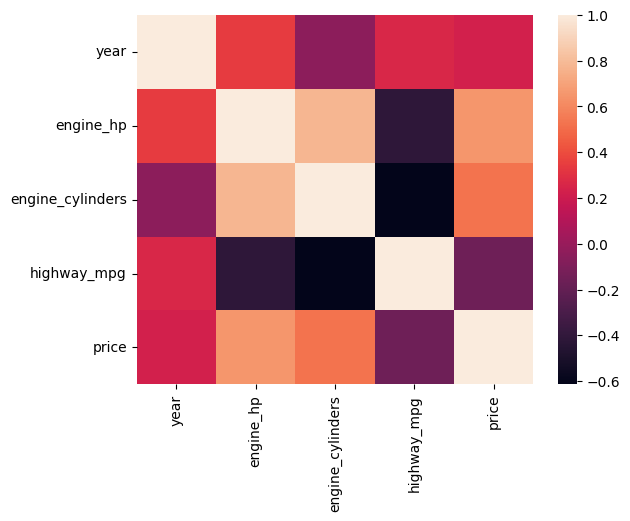

In [7]:
sns.heatmap(table.corr())
#city and highway mpg are the closest correlated

In [8]:
table['above_average'] = (table.price > np.mean(table.price)).astype(int)
table

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,34500,0
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,46120,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,56670,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,50620,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,50920,1


In [9]:
df_train_full, df_test = train_test_split(table, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)
y_train = df_train.above_average.values
y_val = df_val.above_average.values
del df_train['price']
del df_val['price']
del df_train['above_average']
del df_val['above_average']

In [10]:
df_val


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg
1918,Volkswagen,Beetle,2015,210.0,4.0,MANUAL,2dr Hatchback,31
9951,Audi,SQ5,2015,354.0,6.0,AUTOMATIC,4dr SUV,24
5486,Pontiac,Grand Am,2005,140.0,4.0,AUTOMATIC,Sedan,31
292,Nissan,350Z,2009,306.0,6.0,MANUAL,Convertible,24
3644,Ford,E-150,1996,199.0,6.0,AUTOMATIC,Passenger Van,15
...,...,...,...,...,...,...,...,...
4385,Ford,Explorer Sport,2003,203.0,6.0,AUTOMATIC,2dr SUV,19
7339,Subaru,Outback,2016,175.0,4.0,AUTOMATIC,4dr SUV,33
9806,GMC,Sonoma,2003,190.0,6.0,MANUAL,Extended Cab Pickup,17
11162,Aston Martin,V8 Vantage,2015,430.0,8.0,AUTOMATED_MANUAL,Coupe,21


In [11]:
categorical=['make','model','transmission_type','vehicle_style']
numerical=['year','engine_hp','engine_cylinders','highway_mpg',]
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.above_average)
df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi
#transmission type is lowest MI score

,MI
model,0.460994
make,0.238724
vehicle_style,0.083390
transmission_type,0.020884


In [12]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)
X_train.shape
dv.get_feature_names_out()

array(['engine_cylinders', 'engine_hp', 'highway_mpg', 'make=Acura',
       'make=Alfa Romeo', 'make=Aston Martin', 'make=Audi', 'make=BMW',
       'make=Bentley', 'make=Bugatti', 'make=Buick', 'make=Cadillac',
       'make=Chevrolet', 'make=Chrysler', 'make=Dodge', 'make=FIAT',
       'make=Ferrari', 'make=Ford', 'make=GMC', 'make=Genesis',
       'make=HUMMER', 'make=Honda', 'make=Hyundai', 'make=Infiniti',
       'make=Kia', 'make=Lamborghini', 'make=Land Rover', 'make=Lexus',
       'make=Lincoln', 'make=Lotus', 'make=Maserati', 'make=Maybach',
       'make=Mazda', 'make=McLaren', 'make=Mercedes-Benz',
       'make=Mitsubishi', 'make=Nissan', 'make=Oldsmobile',
       'make=Plymouth', 'make=Pontiac', 'make=Porsche',
       'make=Rolls-Royce', 'make=Saab', 'make=Scion', 'make=Spyker',
       'make=Subaru', 'make=Suzuki', 'make=Tesla', 'make=Toyota',
       'make=Volkswagen', 'make=Volvo', 'model=1 Series', 'model=100',
       'model=124 Spider', 'model=190-Class', 'model=2', 'model=

In [13]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
#model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
model.predict_proba(X_val)
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([1.53383948e-03, 9.95950296e-01, 1.93387090e-04, ...,
       3.83511479e-04, 9.86962651e-01, 9.89245369e-01])

In [14]:
pred = y_pred > 0.5
score=0.9345362987830466
np.round((y_val == pred).mean(),2)
#about 0.95

0.95

In [15]:
score-(y_val == pred).mean()
#og = 0.93
#year = 0. 95 = -0.0199999, -0.013848090642047839
#engine_hp = 0.93 = 0, -0.00041963911036513313
#tranmission = 0.95, diff= -0.019999999, 0.009232060428031819
#city = 0.95, -0.01999999, -0.011330255979857373

#engine_hp smallest difference
#year smallest diff

-0.011330255979857373

In [16]:
(y_val == pred).mean()

0.9458665547629039

In [17]:
df_train_full, df_test = train_test_split(table, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)
y_train = df_train.price.values
y_val = df_val.price.values
del df_train['price']
del df_val['price']
del df_train['above_average']
del df_val['above_average']

In [30]:
y_train=np.log(y_train)
y_val = np.log(y_val)
y_train
train_dict = df_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)
X_train.shape
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [31]:
model = Ridge(alpha = 0.1, solver ='sag', random_state = 42)
model.fit(X_train,y_train)

Ridge(alpha=0.1, random_state=42, solver='sag', tol=0.001)

In [32]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
model.predict(X_val)
y_pred = model.predict(X_val)
y_pred
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)
round(rmse(y_pred,y_val),3)

0.053

In [33]:
e=[]
for r in [0, 0.01, 0.1, 1, 10]:
  model = Ridge(alpha = r, solver ='sag', random_state = 42)
  model.fit(X_train,y_train)

  model.predict(X_val)
  y_pred = model.predict(X_val)
  y_pred
  def rmse(y, y_pred):
      error = y_pred - y
      mse = (error ** 2).mean()
      return np.sqrt(mse)
  e.append(round(rmse(y_pred,y_val),3))
e
#all same, 0 is smallest

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[0.053, 0.053, 0.053, 0.053, 0.053]